In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Final.csv to Final.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Final.csv')
df.head()
df = df.drop(['Unnamed: 15', 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24'], axis=1)
print(df)

    Sr.No.               Company  CGPA  Branches  Shift 1 CE  Shift 2 CE  \
0        1         BMC Softwares   PPO    All UG         1.0         2.0   
1        2               Siemens   PPO    All UG         2.0         1.0   
2        3            Tiaa India   PPO    All UG         0.0         1.0   
3        4             Tracelink   PPO    All UG         2.0         1.0   
4        5         Deutsche Bank   PPO    All UG         0.0         0.0   
..     ...                   ...   ...       ...         ...         ...   
218    101             Flo Group    NC  All (UG)         0.0         0.0   
219    102  Agiliad Technologies    NC  All (UG)         0.0         0.0   
220    103                Vertiv    NC  All (UG)         1.0         1.0   
221    104                 Yardi  6.82  All (UG)         1.0         0.0   
222    105             LTI Spark    NC  All (UG)         0.0         0.0   

     Shift 1 ENTC  Shift 2 ENTC  Shift 1 IT  Female  male  Total  Sal LPA  \
0         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sr.No.        221 non-null    object 
 1   Company       222 non-null    object 
 2   CGPA          221 non-null    object 
 3   Branches      221 non-null    object 
 4   Shift 1 CE    221 non-null    float64
 5   Shift 2 CE    221 non-null    float64
 6   Shift 1 ENTC  221 non-null    float64
 7   Shift 2 ENTC  221 non-null    float64
 8   Shift 1 IT    221 non-null    float64
 9   Female        221 non-null    float64
 10  male          221 non-null    float64
 11  Total         221 non-null    float64
 12  Sal LPA       221 non-null    float64
 13  Total_Salary  221 non-null    float64
 14  Year          223 non-null    int64  
dtypes: float64(10), int64(1), object(4)
memory usage: 26.3+ KB


In [ ]:
df.isnull().sum()

,0
Sr.No.,2
Company,1
CGPA,2
Branches,2
Shift 1 CE,2
Shift 2 CE,2
Shift 1 ENTC,2
Shift 2 ENTC,2
Shift 1 IT,2
Female,2


In [ ]:
# 1. Remove any rows with missing or invalid data
# For example, removing rows with '--' or missing salary, CGPA, or year
df.replace('--', pd.NA, inplace=True)  # Replace '--' with NaN (Not Available)
df.replace('-', pd.NA, inplace=True)  # Replace '--' with NaN (Not Available)
df.replace('---', pd.NA, inplace=True)  # Replace '--' with NaN (Not Available)
df

,Sr.No.,Company,CGPA,Branches,Shift 1 CE,Shift 2 CE,Shift 1 ENTC,Shift 2 ENTC,Shift 1 IT,Female,male,Total,Sal LPA,Total_Salary,Year
0,1,BMC Softwares,PPO,All UG,1.0,2.0,0.0,2.0,2.0,2.0,5.0,7.0,14.00,98.00,2024
1,2,Siemens,PPO,All UG,2.0,1.0,2.0,0.0,1.0,2.0,4.0,6.0,11.00,66.00,2024
2,3,Tiaa India,PPO,All UG,0.0,1.0,2.0,0.0,3.0,3.0,3.0,6.0,10.48,62.88,2024
3,4,Tracelink,PPO,All UG,2.0,1.0,0.0,0.0,1.0,4.0,0.0,4.0,12.75,51.00,2024
4,5,Deutsche Bank,PPO,All UG,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,19.63,39.26,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,101,Flo Group,NC,All (UG),0.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,4.00,12.00,2023
219,102,Agiliad Technologies,NC,All (UG),0.0,0.0,2.0,0.0,1.0,0.0,3.0,3.0,5.50,16.50,2023
220,103,Vertiv,NC,All (UG),1.0,1.0,2.0,0.0,2.0,5.0,1.0,6.0,4.50,27.00,2023
221,104,Yardi,6.82,All (UG),1.0,0.0,4.0,0.0,1.0,5.0,1.0,6.0,5.50,33.00,2023


In [ ]:
a=df.duplicated().sum()
print(a)

0


In [ ]:
# 2. Convert columns to appropriate data types
#df['CGPA'] = pd.to_numeric(df['CGPA'])  # Convert CGPA to numeric, errors will become NaN
df['Sal LPA'] = pd.to_numeric(df['Sal LPA'])  # Convert salary to numeric
df['Year'] = df['Year'].astype(int)  # Convert Year to integer type

In [ ]:
# 3. Standardize column names (e.g., removing extra spaces or making them lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df

,sr.no.,company,cgpa,branches,shift_1_ce,shift_2_ce,shift_1_entc,shift_2_entc,shift_1_it,female,male,total,sal_lpa,total_salary,year
0,1,BMC Softwares,PPO,All UG,1.0,2.0,0.0,2.0,2.0,2.0,5.0,7.0,14.00,98.00,2024
1,2,Siemens,PPO,All UG,2.0,1.0,2.0,0.0,1.0,2.0,4.0,6.0,11.00,66.00,2024
2,3,Tiaa India,PPO,All UG,0.0,1.0,2.0,0.0,3.0,3.0,3.0,6.0,10.48,62.88,2024
3,4,Tracelink,PPO,All UG,2.0,1.0,0.0,0.0,1.0,4.0,0.0,4.0,12.75,51.00,2024
4,5,Deutsche Bank,PPO,All UG,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,19.63,39.26,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,101,Flo Group,NC,All (UG),0.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,4.00,12.00,2023
219,102,Agiliad Technologies,NC,All (UG),0.0,0.0,2.0,0.0,1.0,0.0,3.0,3.0,5.50,16.50,2023
220,103,Vertiv,NC,All (UG),1.0,1.0,2.0,0.0,2.0,5.0,1.0,6.0,4.50,27.00,2023
221,104,Yardi,6.82,All (UG),1.0,0.0,4.0,0.0,1.0,5.0,1.0,6.0,5.50,33.00,2023


<ipython-input-8-d07dea24752c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cgpa'] = filtered_df['cgpa'].replace(pd.NaT, pd.NA)  # this line added
<ipython-input-8-d07dea24752c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cgpa'] = pd.to_numeric(filtered_df['cgpa'], errors='coerce') # changed astype to pd.to_numeric


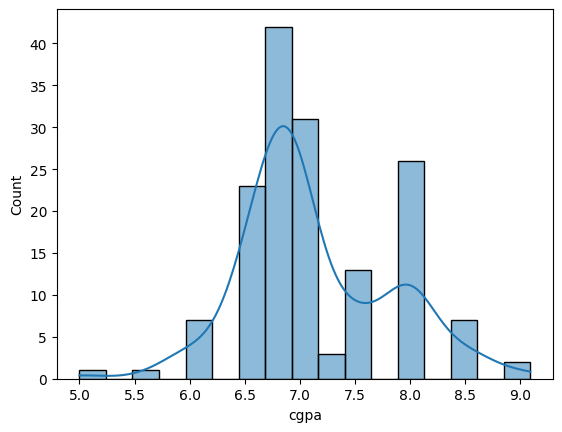

Mean CGPA: 7.120615384615385
Median CGPA: 7.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter out rows where CGPA is "PPO" or "ALL"
filtered_df = df[~df['cgpa'].isin(['PPO', 'All'])]

# Replace NaT values with NaN
filtered_df['cgpa'] = filtered_df['cgpa'].replace(pd.NaT, pd.NA)  # this line added

# Convert CGPA to numeric for further calculations
filtered_df['cgpa'] = pd.to_numeric(filtered_df['cgpa'], errors='coerce') # changed astype to pd.to_numeric

# Visualization and statistics
sns.histplot(filtered_df['cgpa'], kde=True)
plt.show()

print("Mean CGPA:", filtered_df['cgpa'].mean())
print("Median CGPA:", filtered_df['cgpa'].median())

<ipython-input-9-5d934c03d313>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['cgpa'].fillna(filtered_df['cgpa'].median(), inplace=True)
<ipython-input-9-5d934c03d313>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cgpa'].fillna(filtered_df['cgpa'].median(), inplace=True)


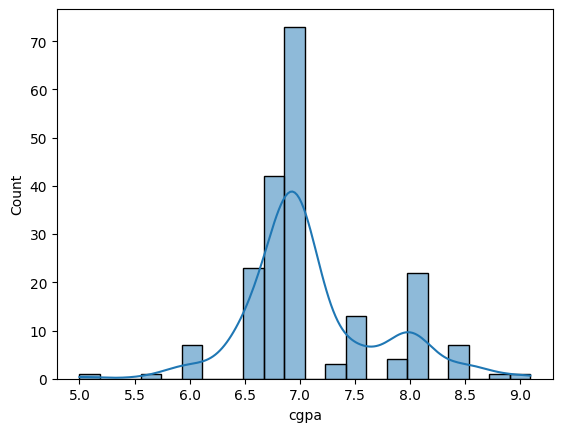

Mean CGPA: 7.0950303030303035
Median CGPA: 7.0


In [ ]:
filtered_df['cgpa'].fillna(filtered_df['cgpa'].median(), inplace=True)

# Visualization and statistics
sns.histplot(filtered_df['cgpa'], kde=True)
plt.show()

print("Mean CGPA:", filtered_df['cgpa'].mean())
print("Median CGPA:", filtered_df['cgpa'].median())


In [ ]:
filtered_df

,sr.no.,company,cgpa,branches,shift_1_ce,shift_2_ce,shift_1_entc,shift_2_entc,shift_1_it,female,male,total,sal_lpa,total_salary,year
6,7,UBS,6.82,All UG,2.0,1.0,4.0,0.0,4.0,9.0,1.0,11.0,12.50,137.50,2024
7,8,PhonePe,6.00,All UG,1.0,1.0,0.0,0.0,1.0,3.0,0.0,3.0,33.53,100.59,2024
8,9,BNY Mellon,7.50,All UG,4.0,0.0,0.0,0.0,1.0,5.0,0.0,5.0,21.64,108.20,2024
9,10,Druva,6.82,All UG,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,20.10,40.20,2024
11,12,Mastercard,7.50,All UG,7.0,2.0,0.0,0.0,6.0,6.0,6.0,15.0,13.40,201.00,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,101,Flo Group,7.00,All (UG),0.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,4.00,12.00,2023
219,102,Agiliad Technologies,7.00,All (UG),0.0,0.0,2.0,0.0,1.0,0.0,3.0,3.0,5.50,16.50,2023
220,103,Vertiv,7.00,All (UG),1.0,1.0,2.0,0.0,2.0,5.0,1.0,6.0,4.50,27.00,2023
221,104,Yardi,6.82,All (UG),1.0,0.0,4.0,0.0,1.0,5.0,1.0,6.0,5.50,33.00,2023


In [ ]:
filtered_df.to_csv('/mydata.csv', index=False)